In [ ]:
#importcác thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# đọc file csv
df = pd.read_csv('Dataset.csv', usecols=['total_injuries','total_hours_worked','annual_average_employees','total_deaths','total_dafw_cases',
                                         'total_poisonings','total_skin_disorders','total_hearing_loss','no_injuries_illnesses'])
df = df.dropna()
df = df.drop_duplicates()
df

,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_injuries,total_poisonings,total_skin_disorders,total_hearing_loss
0,280,579688,1,0,1,6,0,0,0
1,246,501578,1,0,2,13,0,0,0
2,273,619945,1,0,5,18,0,0,0
3,33,75794,1,0,0,1,0,0,0
4,43,114734,1,0,3,6,0,0,0
...,...,...,...,...,...,...,...,...,...
4994,95,148164,1,0,0,3,0,0,0
4996,13,27040,1,0,0,0,0,0,2
4997,26,34006,1,0,0,4,0,0,0
4998,22,44888,1,0,0,1,0,0,0


In [ ]:
#định nghĩa label
def convert_to_label(value):
    if value <= 10:
        return '<= 10'
    elif value < 51:
        return '> 10 and <= 50'
    else:
        return '> 50'

In [ ]:
#tạo label
df['total_injuries_label'] = df['total_injuries'].apply(convert_to_label)

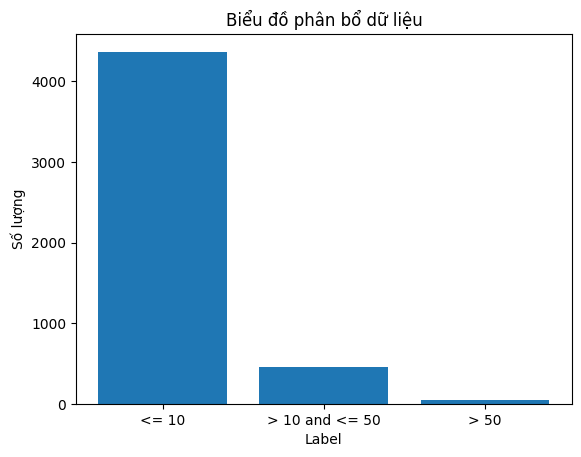

In [ ]:
# xem phân bổ dữ liệu
import matplotlib.pyplot as plt

# Tính số lượng mẫu thuộc vào mỗi label
label_counts = df['total_injuries_label'].value_counts()

# Tạo biểu đồ cột
plt.bar(label_counts.index, label_counts.values)

# Đặt tên cho trục x và trục y
plt.xlabel('Label')
plt.ylabel('Số lượng')

# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ phân bổ dữ liệu')

# Hiển thị biểu đồ
plt.show()

In [ ]:
# tạo biến feature và labels
features = df.drop(['total_injuries','total_injuries_label'], axis=1)
labels = df['total_injuries_label']

In [ ]:
#chia data -> 7 train, 3 test, x: feature, y: label
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predict the response for test dataset
tree_pred = clf.predict(x_test)
tree_pred

In [ ]:
# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Accuracy:  0.9041752224503764
Report:                  precision    recall  f1-score   support

         <= 10       0.95      0.95      0.95      1306
> 10 and <= 50       0.52      0.47      0.49       141
          > 50       0.50      0.79      0.61        14

      accuracy                           0.90      1461
     macro avg       0.65      0.74      0.68      1461
  weighted avg       0.90      0.90      0.90      1461



In [ ]:
test = x_test.head(10)
test

,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_poisonings,total_skin_disorders,total_hearing_loss
1660,465,933720,1,0,0,0,0,0
1106,124,175558,1,0,2,0,0,0
1155,73,152777,1,0,1,0,0,1
2783,69,143520,1,0,0,0,0,0
3175,315,366850,1,0,4,0,0,0
396,22,42515,2,0,0,0,0,0
1901,4,8635,2,0,0,0,0,0
1380,278,558881,1,0,0,0,0,0
4053,1033,1463360,1,0,3,0,0,0
2195,47,68572,1,0,1,0,0,0
